In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [5]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=["date"], parse_dates=["date"])
df
# pd.read_csv?

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
df = df[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


<Axes: xlabel='date', ylabel='value'>

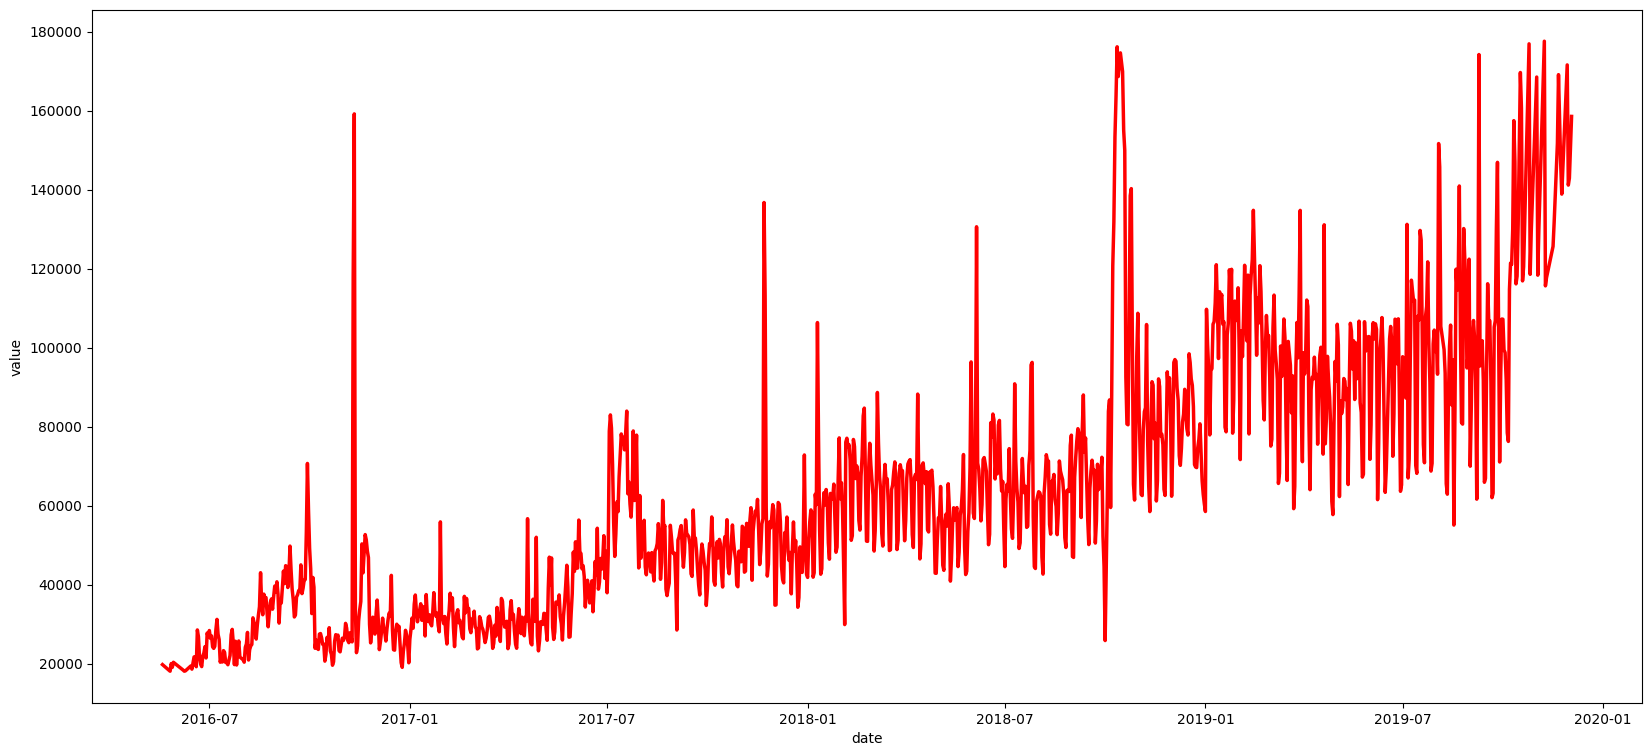

In [7]:
fig = plt.subplots(figsize=(20, 9))
sns.lineplot(df, y="value", x="date", color="r", linewidth=2.5)
# sns.lineplot?

In [8]:
df.reset_index()
df_bar = df.copy()
df_bar["day"] = df_bar.index.day
df_bar["month"] = df_bar.index.month
df_bar.month = df_bar.month.map(
    {
        5: "May",
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December",
    }
)
df_bar["year"] = df_bar.index.year
df_bar
# sns.barplot?

,value,day,month,year
date,,,,
2016-05-19,19736,19,May,2016
2016-05-26,18060,26,May,2016
2016-05-27,19997,27,May,2016
2016-05-28,19044,28,May,2016
2016-05-29,20325,29,May,2016
...,...,...,...,...
2019-11-24,138875,24,November,2019
2019-11-29,171584,29,November,2019
2019-11-30,141161,30,November,2019


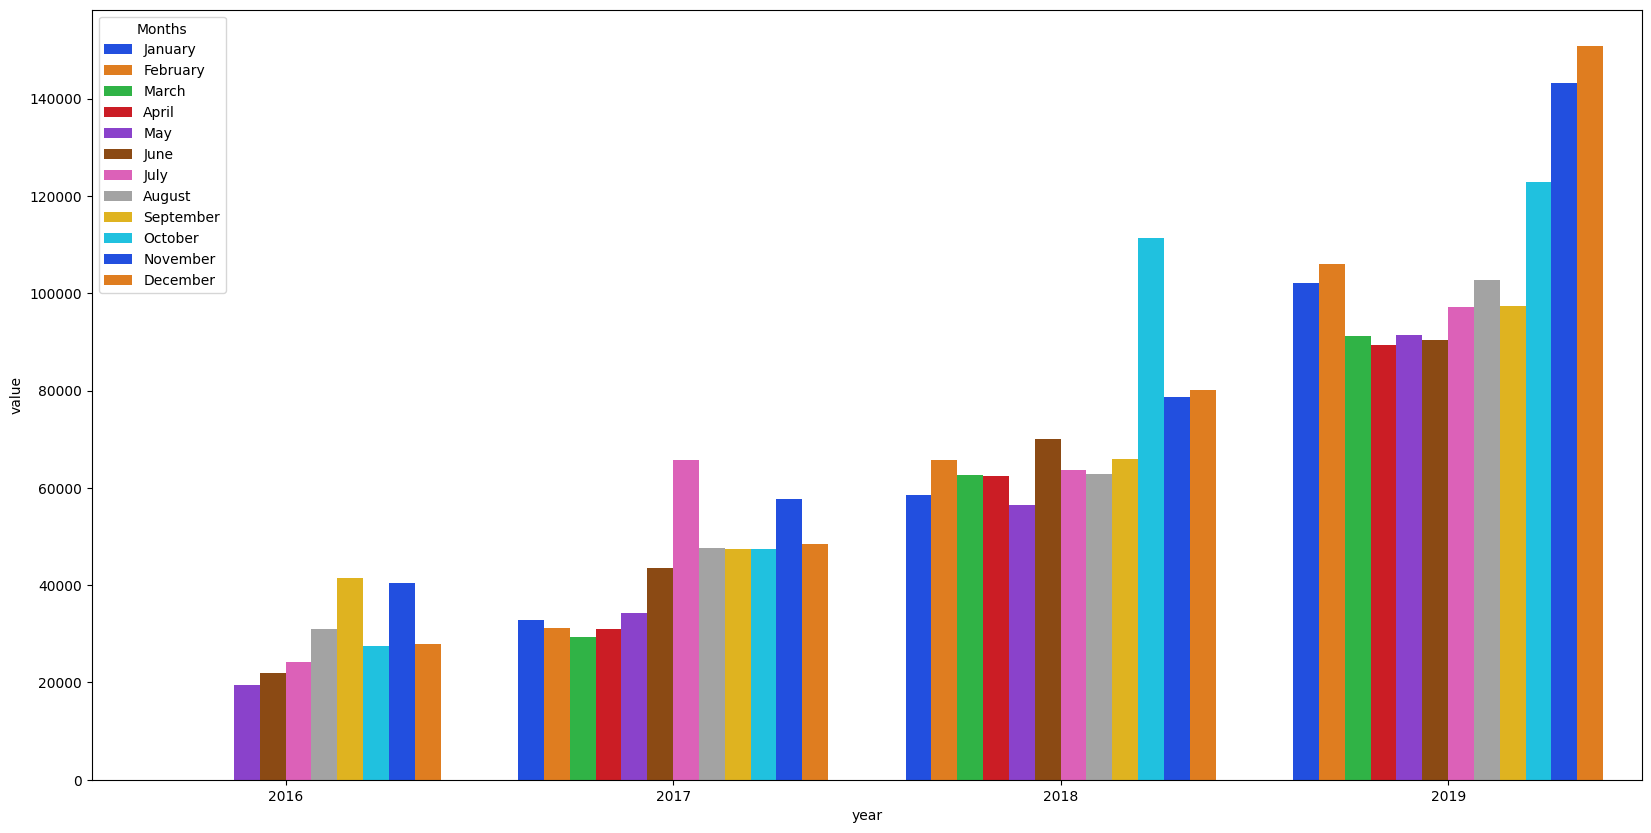

In [9]:
fig = plt.subplots(figsize=(20, 10))
# pal=sns.color_palette("husl", 12)
pal = sns.color_palette("bright", 12)
fig = sns.barplot(
    df_bar,
    x="year",
    y="value",
    hue_order=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    hue="month",
    palette=pal,
    errorbar=None,
)
sns.move_legend(fig, "upper left", title="Months", bbox_to_anchor=(0, 1))
# sns.barplot?

In [10]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]

df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


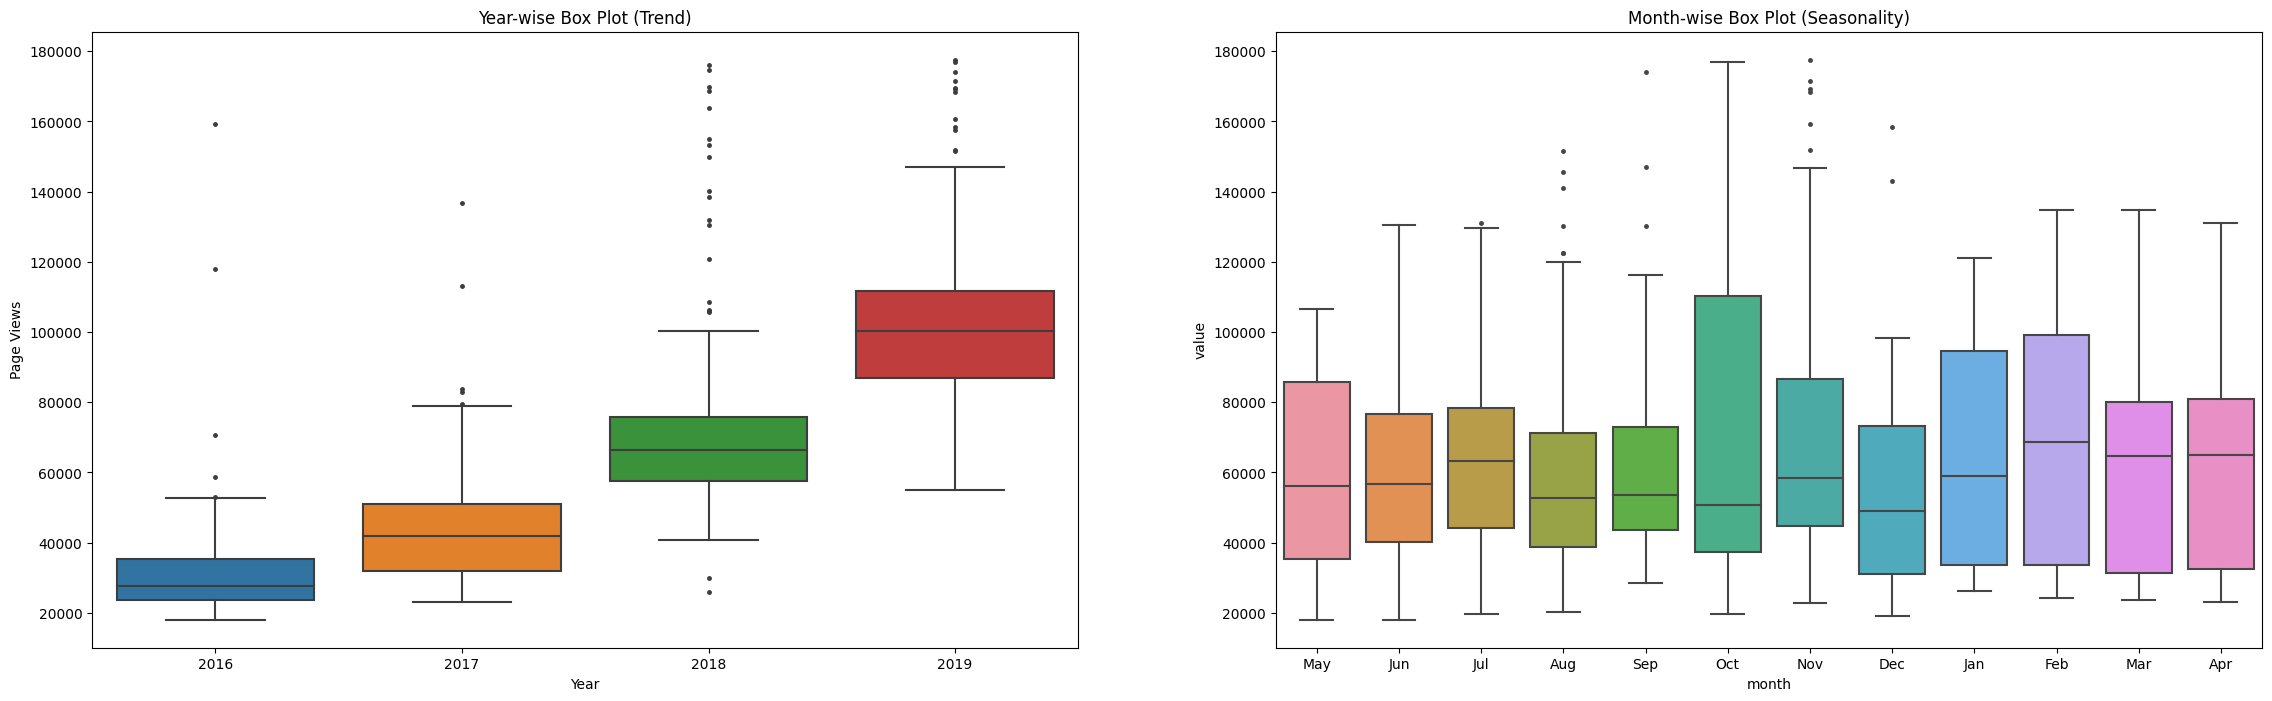

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

.. note::
    Specific artists can be excluded from the automatic legend element
    selection by using a label starting with an underscore, "_".
    A string starting with an underscore is the default label for all
    artis

In [11]:
plot_objects=plt.subplots(ncols=2,figsize=(28,8))
# sns.boxplot?
fig,(ax1,ax2)=plot_objects
sns.boxplot(ax=ax1,data=df_box,
    flierprops={"marker": "."},dodge=False,
    hue='year',width=0.8,    whis=1.5,
    x='year',y='value').set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel('Year')
ax1.legend([], [], frameon=False)
ax1.set_ylabel('Page Views')
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
# ax2.legend.set_visible(False)
ax2.set_ylabel('Page Views')
sns.boxplot(ax=ax2,data=df_box,
    dodge=False,flierprops={"marker":'.'},
    hue='month',width=0.8,    whis=1.5,
    x='month',y='value')
ax2.legend([], [], frameon=False)
# sns.boxplot?
plt.legend?

In [15]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['monthnum']= [d.month for d in df_box.date]
df_box['monthnum']
df_box.sort_values(['monthnum'])
df_box

,date,value,year,month,monthnum
0,2016-05-19,19736,2016,May,5
1,2016-05-26,18060,2016,May,5
2,2016-05-27,19997,2016,May,5
3,2016-05-28,19044,2016,May,5
4,2016-05-29,20325,2016,May,5
...,...,...,...,...,...
1233,2019-11-24,138875,2019,Nov,11
1234,2019-11-29,171584,2019,Nov,11
1235,2019-11-30,141161,2019,Nov,11
1236,2019-12-01,142918,2019,Dec,12
